In [4]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20, 10)

In [6]:
img = imageio.imread('./input/cat-and-dog/training_set/dogs/dog.1.jpg')
img.shape

(499, 327, 3)

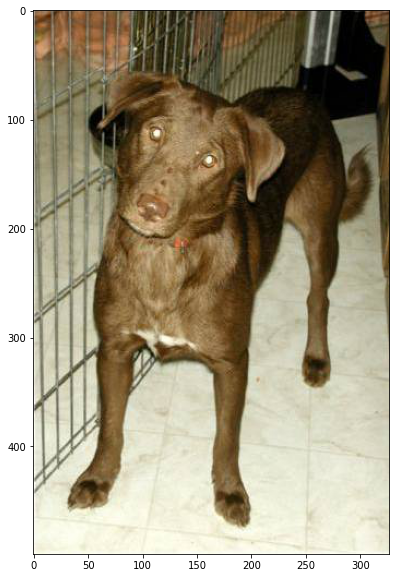

In [7]:
plt.imshow(img)

In [16]:
def show_rgb(img):
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(img[:,:,i], cmap='gray')

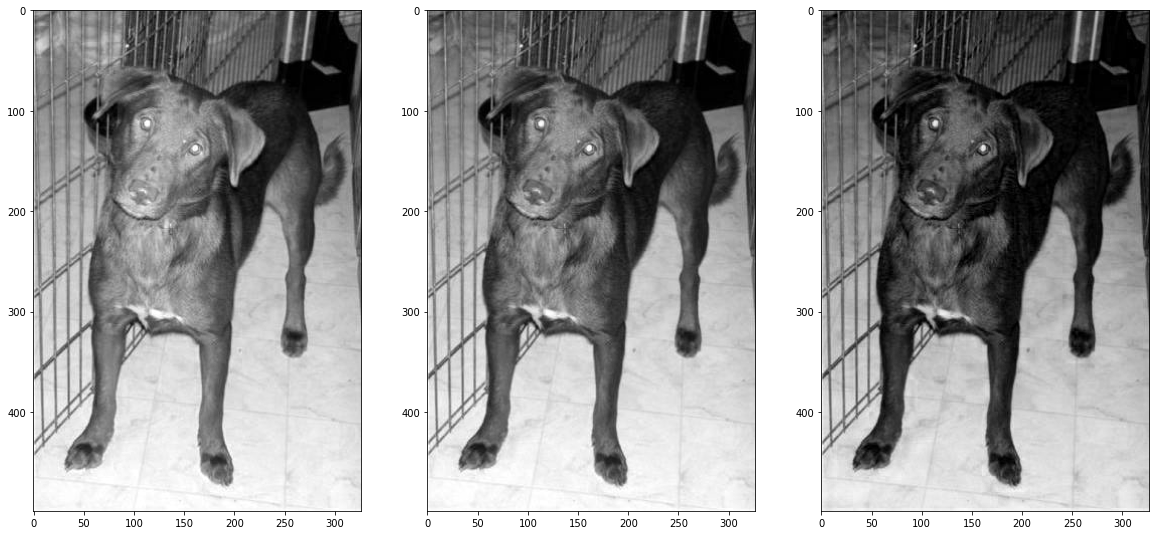

In [17]:
show_rgb(img)

In [18]:
import torch
import numpy as np
import torch.nn.functional as F

In [19]:
x_fc = torch.randn(100,784)
x_fc

tensor([[-0.3742,  0.7327, -0.8192,  ...,  0.5921,  0.4155, -0.4718],
        [ 0.9441,  0.7407, -0.3696,  ..., -0.9236,  1.1810,  1.2454],
        [-0.3410,  0.3875, -0.3875,  ..., -1.1175, -1.5533,  0.9940],
        ...,
        [-0.2366, -1.5200,  0.8120,  ...,  1.9288,  1.4213,  0.6858],
        [-0.1246, -0.2298,  0.0547,  ...,  0.1817,  1.2684,  0.3982],
        [-0.3234,  0.2059, -0.6345,  ..., -0.9029, -0.1679, -0.9377]])

In [20]:
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

tensor([[ 0.0152, -0.0307,  0.0768,  ..., -0.0350, -0.0030, -0.0027],
        [-0.0465, -0.0025,  0.0060,  ...,  0.0119, -0.0829, -0.0290],
        [ 0.0158, -0.0011, -0.0248,  ...,  0.0222,  0.0275,  0.0077],
        ...,
        [-0.0011, -0.0343, -0.0145,  ...,  0.0340, -0.0112,  0.0734],
        [ 0.0543, -0.0086,  0.0476,  ..., -0.0469, -0.0045, -0.0282],
        [-0.0038, -0.0334, -0.0137,  ..., -0.0193,  0.0396,  0.0143]],
       requires_grad=True)

In [21]:
b = torch.zeros(10, requires_grad=True)
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [22]:
y_pre = torch.matmul(x_fc,W)+b
y = F.relu(y_pre)
x_fc.shape, y.shape

(torch.Size([100, 784]), torch.Size([100, 10]))

In [23]:
x_cnn = torch.randn(100,1,28,28)
x_cnn.shape

torch.Size([100, 1, 28, 28])

In [30]:
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()

tensor([[[[ 0.3454,  0.6504,  0.3409],
          [-0.5727,  0.0820, -0.3764],
          [-0.3724,  0.1287,  0.1821]]],


        [[[ 0.0556,  0.1744, -0.4573],
          [ 0.6502,  0.5025, -0.2244],
          [ 0.3626, -0.1019, -0.0699]]],


        [[[-0.4232, -0.2366,  0.2909],
          [ 0.8854,  0.3456, -0.2323],
          [-0.0581,  0.3099, -0.2523]]],


        [[[ 0.3599, -0.1565, -0.2401],
          [ 0.3050, -0.0150, -0.0096],
          [-0.4061,  0.1348,  0.2775]]],


        [[[-0.1944,  0.6668,  0.3243],
          [ 0.0838,  0.6744, -0.2173],
          [ 0.2293,  0.2506,  0.4194]]],


        [[[-0.2385, -0.0253,  0.1159],
          [-0.2030, -0.1749, -0.2593],
          [-0.0076,  0.1255,  0.5183]]],


        [[[ 0.1232,  0.0039, -0.2855],
          [-0.4983,  0.1857, -0.4646],
          [ 0.2371,  0.1807,  0.0685]]],


        [[[-0.3182,  0.5555,  0.6101],
          [ 0.4523, -0.4074, -0.1513],
          [ 0.1987,  0.1652, -0.2496]]],


        [[[ 0.0482,  0.4106,  0.

In [31]:
b1 = torch.zeros(16, requires_grad=True)
b1

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

In [32]:
conv1_pre = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_pre)

In [33]:
x_cnn.shape, conv1.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 16, 28, 28]))

In [34]:
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()

b2 = torch.zeros(32, requires_grad=True)

conv2 = F.relu(F.conv2d(conv1, W2, b2, stride=1, padding=1))
conv2.shape

torch.Size([100, 32, 28, 28])

In [36]:
M = torch.zeros(4, 3)

M2 = M.view(1,1,12)
M3 = M.view(-1)
M4 = M.view(-1,2,3)
M5 = M.view(2,1,2,3)

print("M: {},\nM2: {}, \nM3: {}, \nM4: {}, \nM5: {}.".format(M, M2, M3, M4, M5))

M: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
M2: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 
M3: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 
M4: tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]), 
M5: tensor([[[[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]]]]).


In [38]:
M2.shape, M3.shape, M4.shape, M5.shape

(torch.Size([1, 1, 12]),
 torch.Size([12]),
 torch.Size([2, 2, 3]),
 torch.Size([2, 1, 2, 3]))

In [39]:
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

print(x_reshaped.shape)

torch.Size([100, 1, 28, 28])


In [41]:
h_flat = conv2.view(-1, 28*28*32)

print(h_flat.shape)

torch.Size([100, 25088])


In [42]:
print("Shape of conv2 feature maps before pooling : {0}".format(conv2.shape))

Shape of conv2 feature maps before pooling : torch.Size([100, 32, 28, 28])


In [45]:
max_pool2 = F.max_pool2d(conv2, kernel_size = 2)
print("Shape of conv2 feature maps after pooling : {0}".format(max_pool2.shape))

Shape of conv2 feature maps after pooling : torch.Size([100, 32, 14, 14])


In [46]:
avg_pool2 = F.avg_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after avg pooling : {0}".format(avg_pool2.shape))

Shape of conv2 feature maps after avg pooling : torch.Size([100, 32, 14, 14])


In [53]:
feature_map_fig = torch.tensor(np.array([[1,1,2,4],[5,6,7,8],[3,2,1,0],[1,2,3,4]], dtype = np.float32))
fmap_fig = feature_map_fig.view(1,1,4,4)
print("Feature map shape pre-pooling: {}".format(fmap_fig.shape))
print(torch.squeeze(fmap_fig))

Feature map shape pre-pooling: torch.Size([1, 1, 4, 4])
tensor([[1., 1., 2., 4.],
        [5., 6., 7., 8.],
        [3., 2., 1., 0.],
        [1., 2., 3., 4.]])


In [51]:
max_pool_fig = F.max_pool2d(fmap_fig, kernel_size=2)
print("\nMax pool")
print("Shape: {}".format(max_pool_fig.shape))
print(torch.squeeze(max_pool_fig))


Max pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[6., 8.],
        [3., 4.]])


In [52]:
avg_pool_fig = F.avg_pool2d(fmap_fig, kernel_size=2)
print("\nAvg pool")
print("Shape: {}".format(avg_pool_fig.shape))
print(torch.squeeze(avg_pool_fig))


Avg pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[3.2500, 5.2500],
        [2.0000, 2.0000]])


In [67]:
print("Shape of conv1 feature maps: {0}".format(conv1.shape))

Shape of conv1 feature maps: torch.Size([100, 16, 28, 28])


In [69]:
conv2_strided = F.relu(F.conv2d(conv1, W2, bias=b2, stride=2 ,padding=1))

print("Shape of conv2 feature maps with stride of 2: {0}".format(conv2_strided.shape))

Shape of conv2 feature maps with stride of 2: torch.Size([100, 32, 14, 14])


In [72]:
import torch.nn as nn
from torchsummary import summary

In [71]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [73]:
class Custom_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.fc2 = nn.Linear(256, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        x = x.view(-1, 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        return x

In [74]:
model = Custom_CNN()
model

Custom_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [75]:
summary(model, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           2,432
            Conv2d-2           [-1, 64, 14, 14]          51,264
            Linear-3                  [-1, 256]         803,072
            Linear-4                    [-1, 2]             514
Total params: 857,282
Trainable params: 857,282
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.29
Params size (MB): 3.27
Estimated Total Size (MB): 3.57
----------------------------------------------------------------
